<a href="https://colab.research.google.com/github/bhaarath-M/python_task/blob/main/heart%20prediction%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("ticks")
plt.style.use("fivethirtyeight")

# FEATURES OF THE DATASET

### 1. age of the individuals
### 2. sex
### 3. cp - chest pain type
### 4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
### 5. chol - serum cholestoral in mg/dl
### 6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
### 7. restecg - resting electrocardiographic results
### 8. thalach - maximum heart rate achieved
### 9. exang - exercise induced angina (1 = yes; 0 = no)
### 10. oldpeak - ST depression induced by exercise relative to rest looks at  stress of heart during excercise unhealthy heart will stress more
### 11. slope - the slope of the peak exercise ST segment
### 12. ca - number of major vessels (0-3) colored by flourosopy
### 13. thal - thalium stress result


In [ ]:
df=pd.read_csv("/content/heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [ ]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

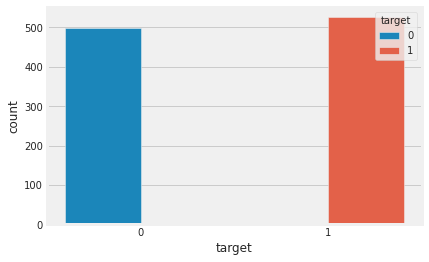

In [ ]:
sns.countplot(x="target",data=df,hue="target")

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
categorical_val=[]
continuous_val=[]
for column in df.columns:
  print("***************************")
  print(f"{column}:{df[column].unique()}")
  if len(df[column].unique())<=10:
    categorical_val.append(column)
  else:
    continuous_val.append(column)

***************************
age:[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
***************************
sex:[1 0]
***************************
cp:[0 1 2 3]
***************************
trestbps:[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
***************************
chol:[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 21

In [ ]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
continuous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

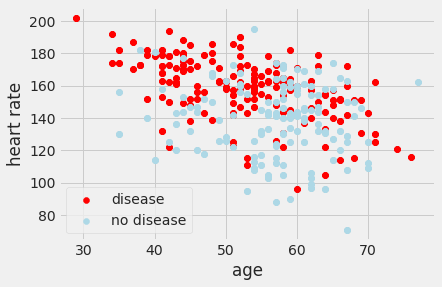

In [ ]:
import matplotlib.style as style
style.use("fivethirtyeight")
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")

plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")
plt.xlabel("age")
plt.ylabel("heart rate")
plt.legend(["disease","no disease"]);

#### from the above graph we understand that we cannot come to a conclusion that the persons whose age is below 30 will definitely  not have a heart disease at the same time the persons whose age is above 70+ will definitely  have  a heart disease

In [ ]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

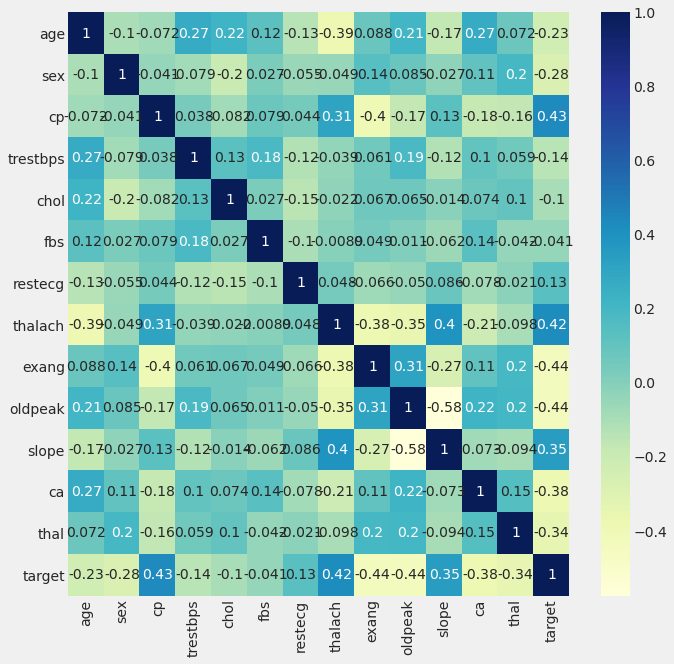

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")


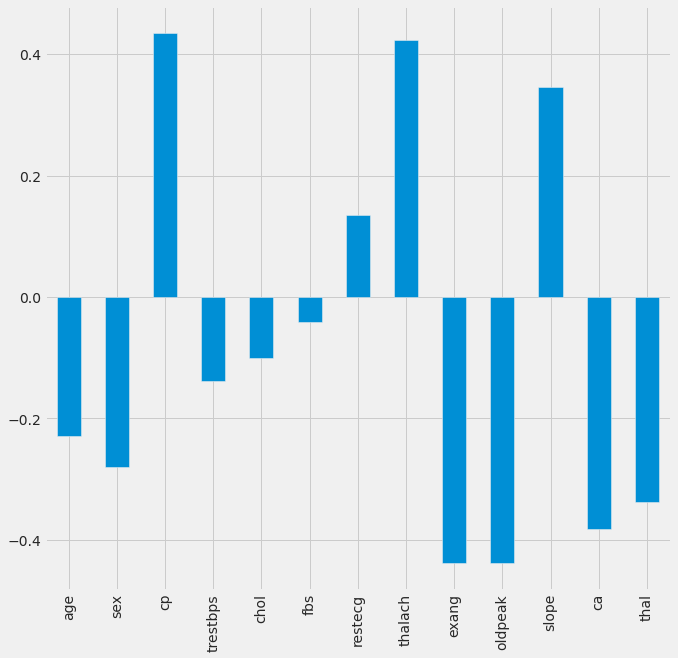

In [ ]:

df.drop("target",axis=1).corrwith(df.target).plot(kind="bar",grid=True,figsize=(10,10))

In [ ]:
categorical_val.remove("target")
data=pd.get_dummies(df,columns=categorical_val)        ### one hot encoder is done 

In [ ]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [ ]:
col=["age","trestbps","chol","thalach","oldpeak"]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[col]=sc.fit_transform(data[col])

In [ ]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [ ]:
x=data.drop("target",axis=1)
y=data["target"]

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30,stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print(f"accuracy score:{accuracy_score(y_test,y_pred)*100:.2f}")
print(classification_report(y_test,y_pred))

[[125  25]
 [ 20 138]]
accuracy score:85.39
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       150
           1       0.85      0.87      0.86       158

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric="euclidean")
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred1=knn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred1))
print(f"accuracy score:{accuracy_score(y_test,y_pred1)*100:.2f}")
print(classification_report(y_test,y_pred1))

[[126  24]
 [ 30 128]]
accuracy score:82.47
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       150
           1       0.84      0.81      0.83       158

    accuracy                           0.82       308
   macro avg       0.82      0.83      0.82       308
weighted avg       0.83      0.82      0.82       308



In [ ]:
dict={"n_neighbors":[2,3,4,5,6,8,9,10,11,12,13],"weights":["uniform","distance"],"metric":["euclidean","manhattan"]}
gs=GridSearchCV(knn,dict,n_jobs=-1,verbose=1,cv=3)
gs.fit(x_train,y_train)
gs.best_params_

Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:    3.2s finished


{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

In [ ]:
knn=KNeighborsClassifier(metric='euclidean',n_neighbors=13,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='distance')

In [ ]:
y_pred2=knn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred2))
print(f"accuracy score:{accuracy_score(y_test,y_pred2)*100:.2f}")
print(classification_report(y_test,y_pred2))

[[147   3]
 [  0 158]]
accuracy score:99.03
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       150
           1       0.98      1.00      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

